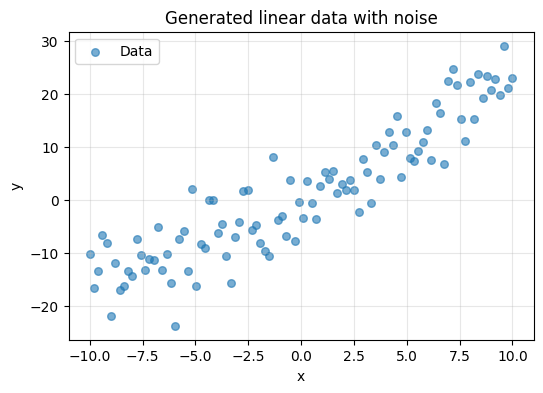

In [2]:
# Cell 1 — 生成线性数据 y = 2 x + 1 + 噪声，并画出原始散点

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

# 1) 生成数据
m = 100                                     # 样本数
X = np.linspace(-10, 10, m)[:, None]       # 形状 [m,1]
true_w, true_b = 2.0, 1.0                   # 真实斜率与截距
noise = np.random.randn(m) * 5.0            # 高斯噪声
y = true_w * X.flatten() + true_b + noise   # 生成标签

# 2) 可视化散点
plt.figure(figsize=(6,4))
plt.scatter(X, y, s=30, alpha=0.6, label="Data")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Generated linear data with noise")
plt.legend(); plt.grid(alpha=0.3)
plt.show()


Normal Eqn solution: w = 1.9257, b = 1.2990


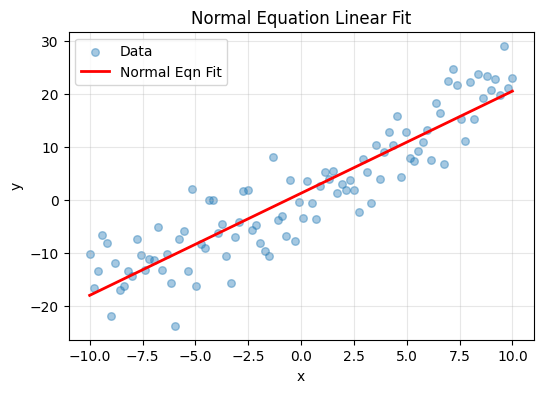

In [3]:
# Cell 2 — 用正规方程 (Normal Equation) 求解 θ = (w,b)

# 1) 构造增广矩阵 X_aug = [X | 1]
X_aug = np.hstack([X, np.ones((m,1))])     # 形状 [m,2]

# 2) 正规方程解法： θ = (X^T X)^{-1} X^T y
theta_normal = np.linalg.inv(X_aug.T.dot(X_aug)).dot(X_aug.T).dot(y)
w_norm, b_norm = theta_normal
print(f"Normal Eqn solution: w = {w_norm:.4f}, b = {b_norm:.4f}")

# 3) 画拟合直线
x_plot = np.linspace(-10,10,200)
y_norm = w_norm * x_plot + b_norm

plt.figure(figsize=(6,4))
plt.scatter(X, y, s=30, alpha=0.4, label="Data")
plt.plot(x_plot, y_norm, 'r-', linewidth=2, label="Normal Eqn Fit")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Normal Equation Linear Fit")
plt.legend(); plt.grid(alpha=0.3)
plt.show()


GD solution after 200 epochs: w = 1.9257, b = 1.2762


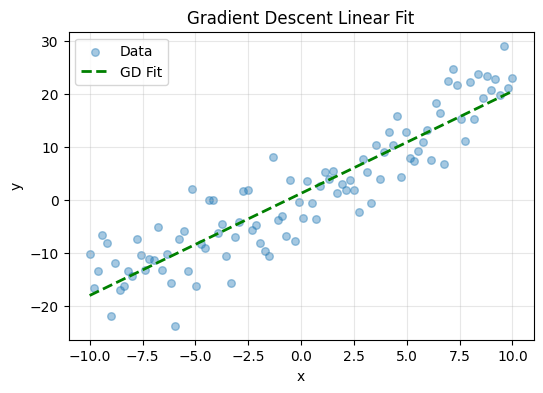

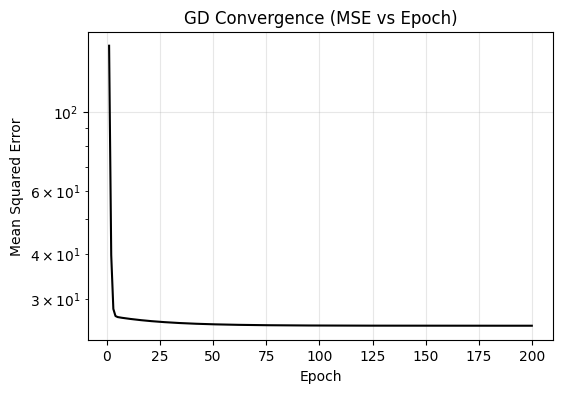

In [4]:
# Cell 3 — 用梯度下降 (GD) 求解，再画拟合直线

# 梯度下降超参数
lr = 0.01
epochs = 200

# 初始化参数
w_gd = 0.0
b_gd = 0.0

# 记录迭代过程中的损失
loss_hist = []

# GD 主循环
for ep in range(epochs):
    # 预测与残差
    y_pred = w_gd * X.flatten() + b_gd
    r = y_pred - y
    
    # 计算梯度：∂/∂w = (2/m) X^T r ; ∂/∂b = (2/m) sum(r)
    grad_w = (2/m) * np.dot(X.flatten(), r)
    grad_b = (2/m) * np.sum(r)
    
    # 参数更新
    w_gd -= lr * grad_w
    b_gd -= lr * grad_b
    
    # 记录当前损失 (MSE)
    loss = (r**2).mean()
    loss_hist.append(loss)

# 打印最终结果
print(f"GD solution after {epochs} epochs: w = {w_gd:.4f}, b = {b_gd:.4f}")

# 绘制 GD 拟合直线
y_gd = w_gd * x_plot + b_gd
plt.figure(figsize=(6,4))
plt.scatter(X, y, s=30, alpha=0.4, label="Data")
plt.plot(x_plot, y_gd, 'g--', linewidth=2, label="GD Fit")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Gradient Descent Linear Fit")
plt.legend(); plt.grid(alpha=0.3)
plt.show()

# 同时绘制损失曲线
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, epochs+1), loss_hist, 'k-')
plt.xlabel("Epoch"); plt.ylabel("Mean Squared Error")
plt.title("GD Convergence (MSE vs Epoch)")
plt.yscale("log"); plt.grid(alpha=0.3)
plt.show()


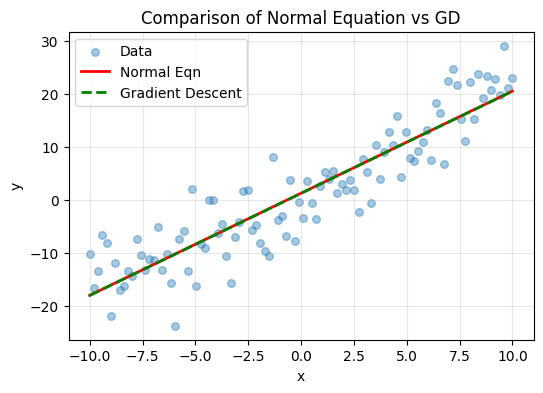

In [5]:
# Cell 4 — 把两条拟合直线画到同一张图中对比

plt.figure(figsize=(6,4))
plt.scatter(X, y, s=30, alpha=0.4, label="Data")
plt.plot(x_plot, y_norm, 'r-', lw=2, label="Normal Eqn")
plt.plot(x_plot, y_gd,   'g--',lw=2, label="Gradient Descent")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Comparison of Normal Equation vs GD")
plt.legend(); plt.grid(alpha=0.3)
plt.show()
